In [1]:
## THIS DATASET CONTAINS 79 EXPLANATORY VARIABLES DESCRIBING ALMOST
## EVERY ASPECT OF RESIDENCIAL HOMES IN AMES, LOWA
## OUR GOAL IS TO CORRECTLY PREDICT THE FINAL PRICE OF EACH HOME

In [2]:
## OVERVIEW
# 1) UNDERSTAND THE DATA (INFO, DESCRIBE, Nº OF MISSING VALUES, ETC...)
# 2) DATA EXPLORATION
# 3) DATA CLEANING
# 4) FEATURE ENGINEERING
# 5) MODEL BUILDING 
# 6) MODEL PERFORMANCE
# 7) RESULTS 

In [3]:
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df_train = pd.read_csv('train.csv')

In [5]:
df_test= pd.read_csv('test.csv')

In [6]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [10]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [11]:
df_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1459.0,2190.000000,421.321334,1461.0,1825.50,2190.0,2554.50,2919.0
MSSubClass,1459.0,57.378341,42.746880,20.0,20.00,50.0,70.00,190.0
LotFrontage,1232.0,68.580357,22.376841,21.0,58.00,67.0,80.00,200.0
LotArea,1459.0,9819.161069,4955.517327,1470.0,7391.00,9399.0,11517.50,56600.0
OverallQual,1459.0,6.078821,1.436812,1.0,5.00,6.0,7.00,10.0
OverallCond,1459.0,5.553804,1.113740,1.0,5.00,5.0,6.00,9.0
YearBuilt,1459.0,1971.357779,30.390071,1879.0,1953.00,1973.0,2001.00,2010.0
YearRemodAdd,1459.0,1983.662783,21.130467,1950.0,1963.00,1992.0,2004.00,2010.0
MasVnrArea,1444.0,100.709141,177.625900,0.0,0.00,0.0,164.00,1290.0
BsmtFinSF1,1458.0,439.203704,455.268042,0.0,0.00,350.5,753.50,4010.0


In [12]:
df_train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

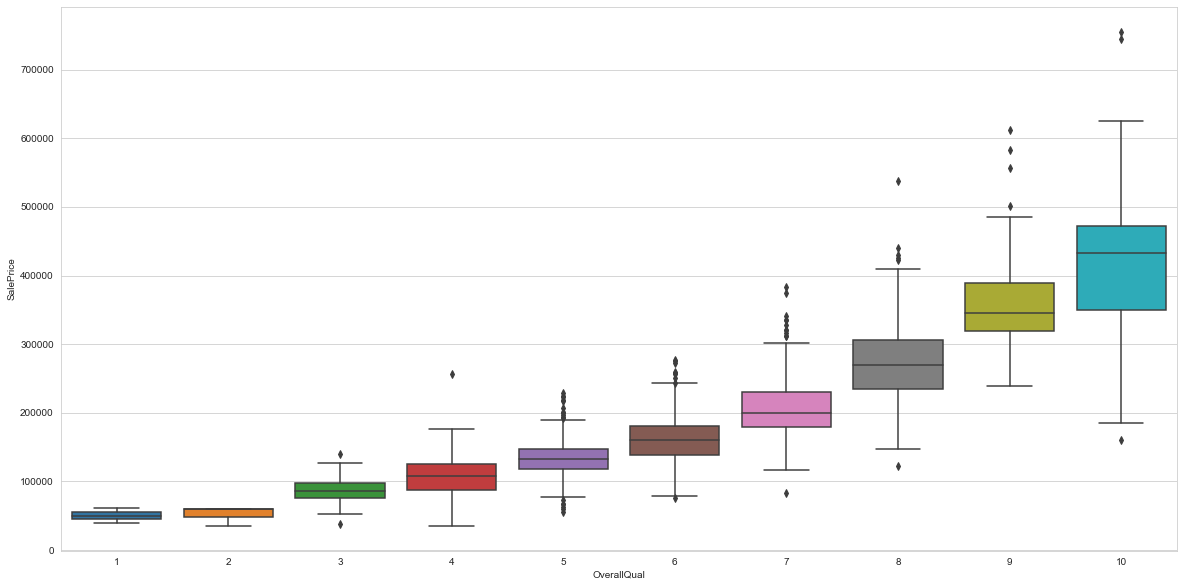

In [13]:
#Correlation between OverallQual and Saleprice
plt.figure(figsize=(20,10))

sns.boxplot(x='OverallQual',y='SalePrice',data=df_train)

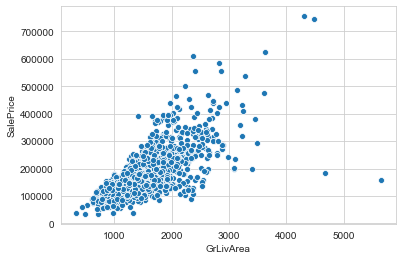

In [14]:
#Correlation between Ground Living Area and Saleprice
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df_train)

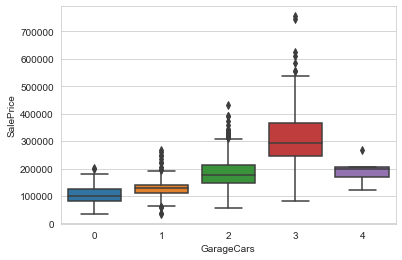

In [15]:
#Correlation between how many cars fit in the garage and Saleprice

sns.boxplot(x='GarageCars',y='SalePrice',data=df_train)

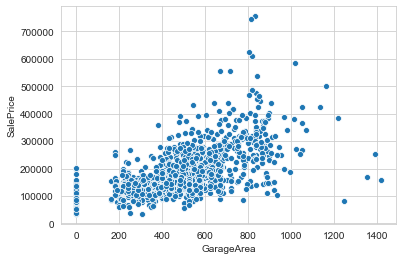

In [16]:
#Correlation between Garage Area  and Saleprice
sns.scatterplot(x='GarageArea',y='SalePrice',data=df_train)

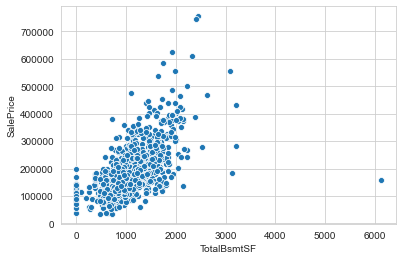

In [17]:
#Correlation between Total Basement Surface  and Saleprice
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=df_train)

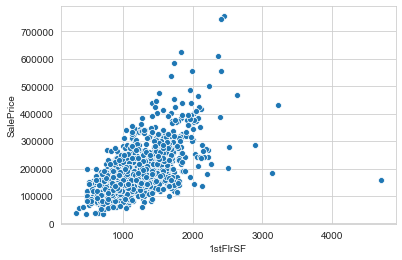

In [18]:
#Correlation between first floor Surface  and Saleprice
sns.scatterplot(x='1stFlrSF',y='SalePrice',data=df_train)

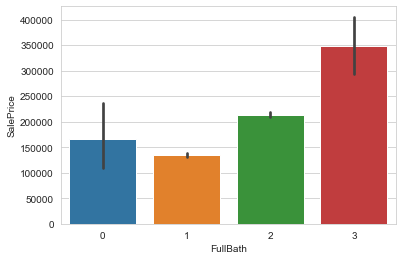

In [19]:
#Correlation between how many full baths have the house and Saleprice
sns.barplot(x='FullBath',y='SalePrice',data=df_train)

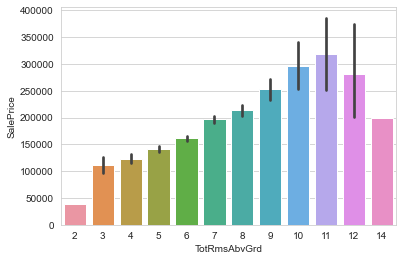

In [20]:
#Correlation between total rooms above grade (no bath inclueded) and Saleprice
sns.barplot(x='TotRmsAbvGrd',y='SalePrice',data=df_train)

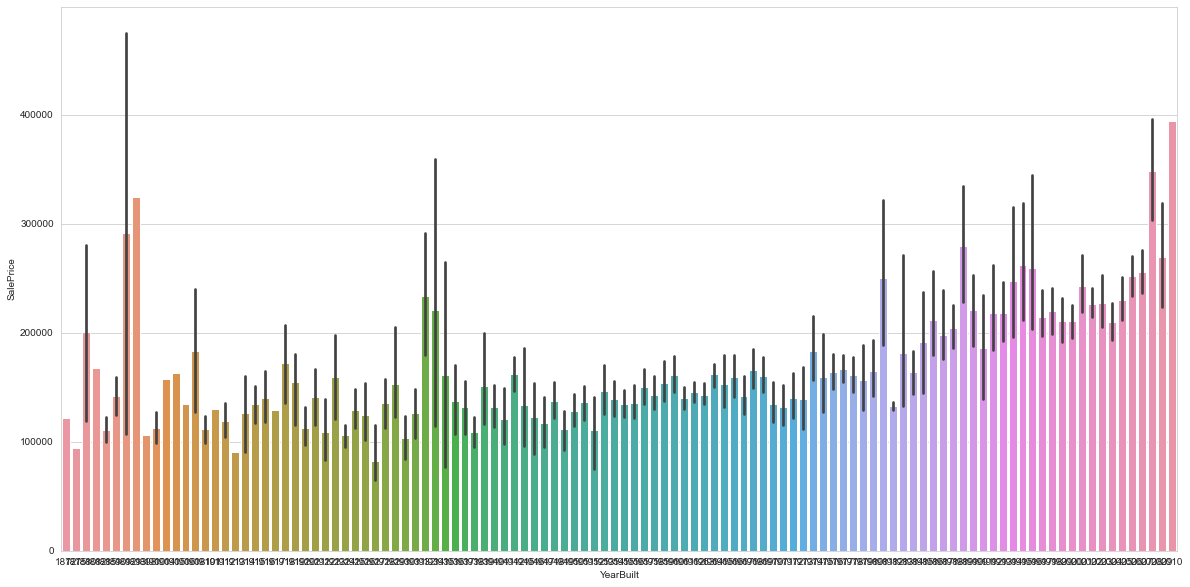

In [21]:
## correlation between year built and year remodel
plt.figure(figsize=(20,10))
sns.barplot(x='YearBuilt',y='SalePrice',data=df_train)

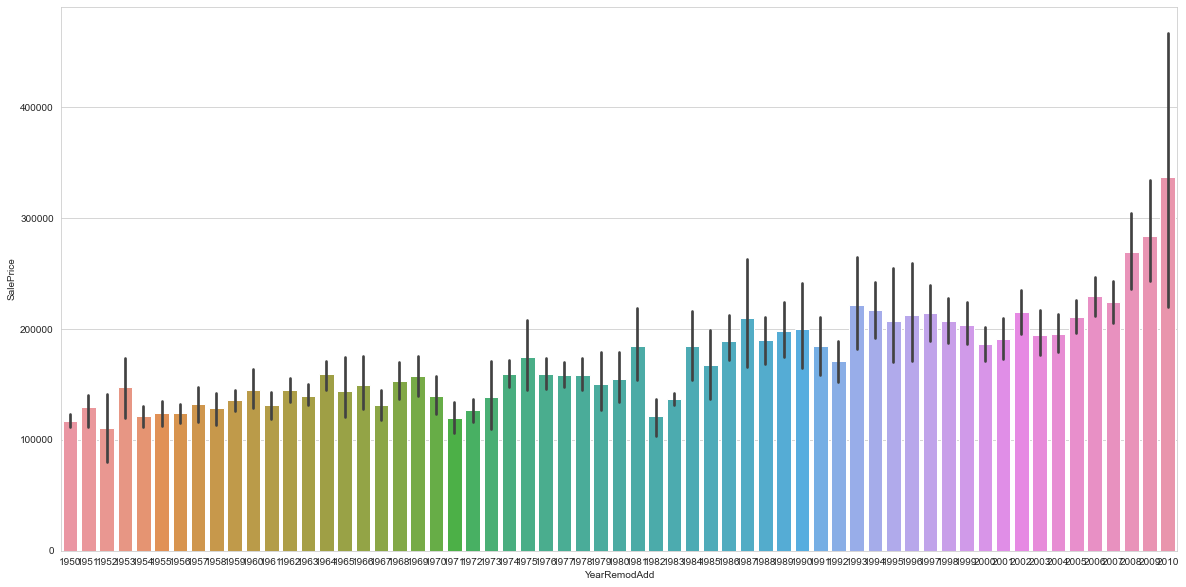

In [22]:
plt.figure(figsize=(20,10))
sns.barplot(x='YearRemodAdd',y='SalePrice',data=df_train)

In [23]:
100 *(df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False).head(20)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Utilities        0.000000
dtype: float64

In [24]:
100 *(df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False).head(34)

PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
FireplaceQu     50.034270
LotFrontage     15.558602
GarageCond       5.346127
GarageQual       5.346127
GarageYrBlt      5.346127
GarageFinish     5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtQual         3.015764
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
MasVnrType       1.096642
MasVnrArea       1.028101
MSZoning         0.274160
BsmtHalfBath     0.137080
Utilities        0.137080
Functional       0.137080
BsmtFullBath     0.137080
BsmtFinSF2       0.068540
BsmtFinSF1       0.068540
Exterior2nd      0.068540
BsmtUnfSF        0.068540
TotalBsmtSF      0.068540
SaleType         0.068540
Exterior1st      0.068540
KitchenQual      0.068540
GarageArea       0.068540
GarageCars       0.068540
HouseStyle       0.000000
dtype: float64

In [25]:
###CLEANING OUR DATA,FILLING NA AND FEATURE ENGINEERING.

corr_dict_saleprice = df_train.corr()['SalePrice'].sort_values(ascending=False).to_dict()
important_columns = []
non_important_columns = []
for key,value in corr_dict_saleprice.items():
    if ((value > 0.1) & (value < 0.8)) | (value <= -0.1):
        important_columns.append(key)
    elif (value < 0.1) & (value > -0.1):
        non_important_columns.append(key)
        

In [26]:
df_train[important_columns[2]] = df_train[important_columns[2]].fillna(df_train[important_columns[2]].mean().round())
df_test[important_columns[2]] = df_test[important_columns[2]].fillna(df_test[important_columns[2]].mean().round())

In [27]:
for df in [df_train,df_test]:
    df['exists_garage'] = df[important_columns[3]].apply(lambda x: 1 if x>0 else 0)

In [28]:
for df in [df_train,df_test]:
    df['exists_basement'] = df[important_columns[4]].apply(lambda x: 1 if x>0 else 0)
    df['Total_home_square_feet'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] +  + df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'])
    df['Total_bath'] = (df['BsmtFullBath'] + (0.5*df['BsmtHalfBath']) + df['FullBath'] + (0.5*df['HalfBath']))
    df['MasVnrArea']  = df['MasVnrArea'].fillna(df.groupby('MasVnrType')['MasVnrArea'].transform('mean'))
    df['MasVnrArea'].interpolate(method='linear',inplace=True)
    df['MasVnrArea'] = df['MasVnrArea'].astype(int)

In [29]:
for df in [df_train,df_test]:
    df['exists_fireplace'] = df['Fireplaces'].apply(lambda x: 1 if x>0 else 0)
    df['LotFrontage'] = df['LotFrontage'].fillna(df.groupby('LotArea')['LotFrontage'].transform('mean'))
    df['LotFrontage'] = df['LotFrontage'].interpolate(method='linear')
    df['LotFrontage'] = df['LotFrontage'].astype(int)
    df['Total_porch_area'] = (df['WoodDeckSF'] + df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch'])
    df['exists_pool'] = df['PoolArea'].apply(lambda x: 1 if x>0 else 0)
    

In [30]:
for df in [df_train,df_test]:
    df.loc[df['Fireplaces'] == 0, 'FireplaceQu'] = 'None'
    df.loc[df['BsmtFinSF1'] == 0, 'BsmtFinType1'] = 'Unf'
    df.loc[df['BsmtFinSF2'] == 0, 'BsmtFinType2'] = 'Unf'
    df.loc[df['BsmtFinSF2'] == 0, 'BsmtQual'] = 'TA'
    

In [31]:
for item in non_important_columns:
    df_train = df_train.drop(item,axis=1)
    df_test = df_test.drop(item,axis=1)
    

In [32]:
for df in [df_train,df_test]:
    df['PoolQC'] = df['PoolQC'].fillna('None')
    df['MiscFeature'] =  df['MiscFeature'].fillna('None')
    df['Alley'] = df['Alley'].fillna('None')
    df['Fence'] = df['Fence'].fillna('None')
    
    
    

In [33]:
for i in df_train.columns:
    if 'SalePrice' not in i:
        if 'object' in str(df_train[i].dtype):
            df_train[str(i)] = df_train[str(i)].fillna(method='ffill')

In [34]:
for i in df_test.columns:
    if 'SalePrice' not in i:
        if 'object' in str(df_test[i].dtype):
            df_test[str(i)] = df_test[str(i)].fillna(method='ffill')

In [35]:
for df in [df_train,df_test]:
    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df.groupby('YearBuilt')['GarageYrBlt'].transform('mean'))
    df['GarageYrBlt'] = df['GarageYrBlt'].interpolate(method='linear')
    df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)
    

In [36]:
for i in df_train.columns:
    if'SalePrice'not in i:
        if df_train[i].dtype != 'object':
            df_train[i] = df_train[i].fillna(0)

In [37]:
for i in df_test.columns:
    if'SalePrice'not in i:
        if df_test[i].dtype != 'object':
            df_test[i] = df_test[i].fillna(0)

In [38]:
#OUTLIERS

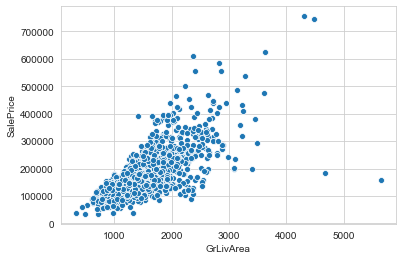

In [39]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df_train)

In [40]:
df_train = df_train[df_train['GrLivArea'] < 4000]

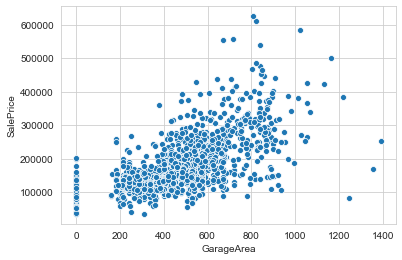

In [41]:
sns.scatterplot(x='GarageArea',y='SalePrice',data=df_train)

In [42]:
df_train = df_train[df_train['GarageArea'] < 1221 ]

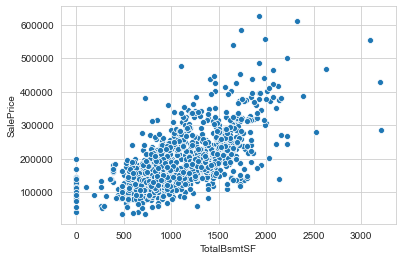

In [43]:
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=df_train)

In [44]:
df_train = df_train[df_train['TotalBsmtSF'] < 3000 ]

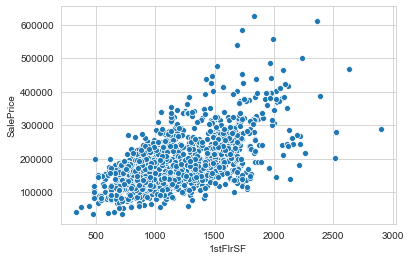

In [45]:
sns.scatterplot(x='1stFlrSF',y='SalePrice',data=df_train)

In [46]:
df_train = df_train[df_train['1stFlrSF'] < 3000 ]

In [47]:

qual_group = df_train.groupby('OverallQual')['SalePrice']

In [48]:
Q1 = qual_group.quantile(0.25)
Q3 = qual_group.quantile(0.75)
IIQ = Q3-Q1
lower_limit = Q1 - 1.5*IIQ
upper_limit = Q3 + 1.5*IIQ

In [49]:
df_train1 = pd.DataFrame()
for item in qual_group.groups.keys():
    
    is_item = df_train['OverallQual'] == item
    accept_limit = (df_train['SalePrice'] >= lower_limit[item]) & (df_train['SalePrice'] <= upper_limit[item])
    select = is_item & accept_limit
    data_selected = df_train[select]
    df_train1 = pd.concat([df_train1,data_selected])

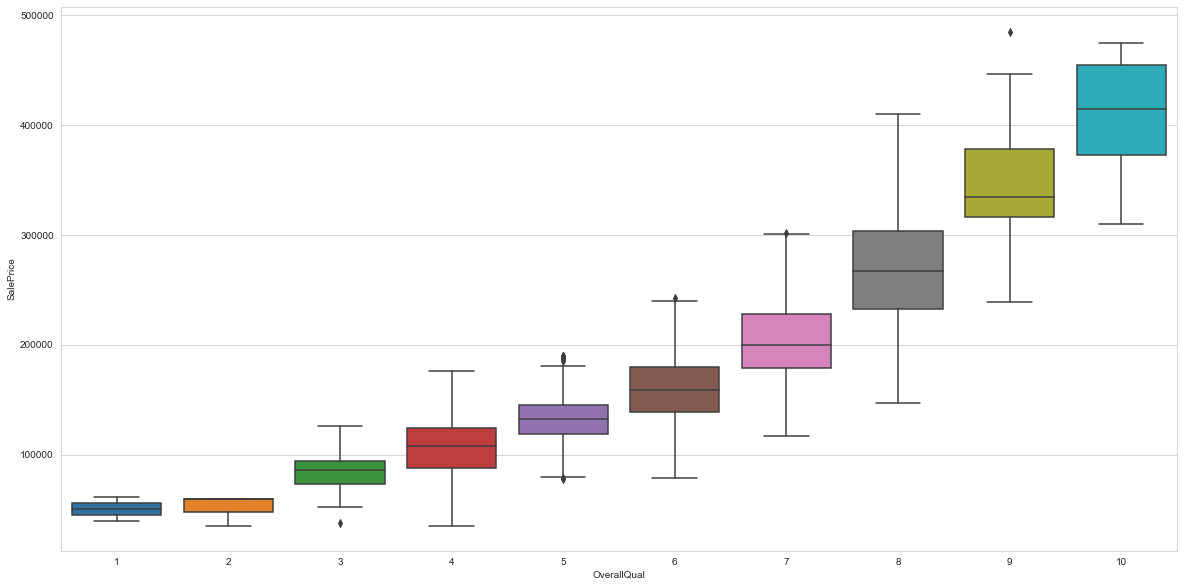

In [50]:
plt.figure(figsize=(20,10))

sns.boxplot(x='OverallQual',y='SalePrice',data=df_train1)

In [51]:
garagecars_group = df_train1.groupby('GarageCars')['SalePrice']

In [52]:
Q1 = garagecars_group.quantile(0.25)
Q3 = garagecars_group.quantile(0.75)
IIQ = Q3-Q1
lower_limit = Q1 - 1.5*IIQ
upper_limit = Q3 + 1.5*IIQ

In [53]:
df_train2 = pd.DataFrame()
for item in garagecars_group.groups.keys():
    
    is_item = df_train1['GarageCars'] == item
    accept_limit = (df_train1['SalePrice'] >= lower_limit[item]) & (df_train1['SalePrice'] <= upper_limit[item])
    select = is_item & accept_limit
    data_selected = df_train1[select]
    df_train2 = pd.concat([df_train2,data_selected])

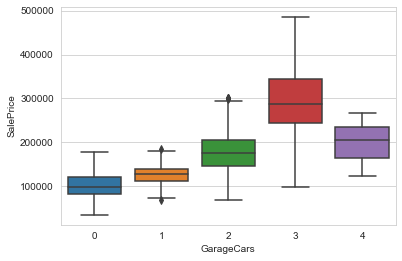

In [54]:
sns.boxplot(x='GarageCars',y='SalePrice',data=df_train2)

In [55]:
bath_group = df_train2.groupby('FullBath')['SalePrice']

In [56]:

Q1 = bath_group.quantile(0.25)
Q3 = bath_group.quantile(0.75)
IIQ = Q3-Q1
lower_limit = Q1 - 1.5*IIQ
upper_limit = Q3 + 1.5*IIQ

In [57]:
df_train3 = pd.DataFrame()
for item in bath_group.groups.keys():
    
    is_item = df_train2['FullBath'] == item
    accept_limit = (df_train2['SalePrice'] >= lower_limit[item]) & (df_train2['SalePrice'] <= upper_limit[item])
    select = is_item & accept_limit
    data_selected = df_train2[select]
    df_train3 = pd.concat([df_train3,data_selected])

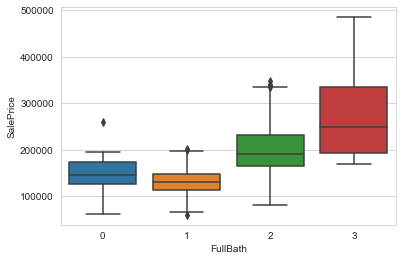

In [58]:
sns.boxplot(x='FullBath',y='SalePrice',data=df_train3)

In [59]:
room_group = df_train3.groupby('TotRmsAbvGrd')['SalePrice']

In [60]:

Q1 = room_group.quantile(0.25)
Q3 = room_group.quantile(0.75)
IIQ = Q3-Q1
lower_limit = Q1 - 1.5*IIQ
upper_limit = Q3 + 1.5*IIQ

In [61]:
df_train4 = pd.DataFrame()
for item in room_group.groups.keys():
    
    is_item = df_train3['TotRmsAbvGrd'] == item
    accept_limit = (df_train3['SalePrice'] >= lower_limit[item]) & (df_train3['SalePrice'] <= upper_limit[item])
    select = is_item & accept_limit
    data_selected = df_train3[select]
    df_train4 = pd.concat([df_train4,data_selected])

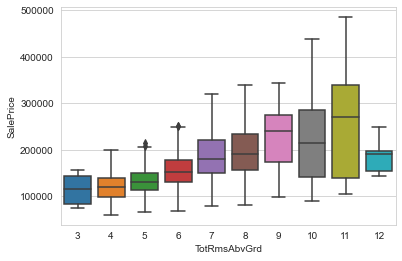

In [62]:
sns.boxplot(x='TotRmsAbvGrd',y='SalePrice',data=df_train4)

In [63]:
##SKEW

In [64]:
all_data = pd.concat([df_train4,df_test])

In [65]:
numeric_features = all_data.dtypes[all_data.dtypes != 'object'].index

In [66]:
from scipy.stats import skew

In [67]:
skewed_features = all_data[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)

In [68]:
high_skewness = skewed_features[abs(skewed_features)>0.9]

In [69]:
skewed_features = high_skewness.index

In [70]:
print(high_skewness)
print('\nVariables with high skewness: \n\n',skewed_features)

exists_pool               16.465226
KitchenAbvGr               4.220586
EnclosedPorch              4.028661
ScreenPorch                4.017530
LotArea                    3.105490
MasVnrArea                 2.709489
OpenPorchSF                2.446784
WoodDeckSF                 1.889630
Total_porch_area           1.414735
1stFlrSF                   1.372305
Total_home_square_feet     1.322525
LotFrontage                1.067068
BsmtFinSF1                 1.013570
GrLivArea                  0.991966
exists_garage             -3.946815
exists_basement           -5.752765
dtype: float64

Variables with high skewness: 

 Index(['exists_pool', 'KitchenAbvGr', 'EnclosedPorch', 'ScreenPorch',
       'LotArea', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF',
       'Total_porch_area', '1stFlrSF', 'Total_home_square_feet', 'LotFrontage',
       'BsmtFinSF1', 'GrLivArea', 'exists_garage', 'exists_basement'],
      dtype='object')


In [71]:
import scipy
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy.stats import boxcox

for feature in skewed_features:
    all_data[feature] = boxcox1p(all_data[feature],boxcox_normmax(all_data[feature] +1))
    
    

c:\users\óscar\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
c:\users\óscar\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:3538: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


In [72]:
all_data = pd.get_dummies(all_data)

In [73]:
#Split to train test again
n_train = df_train4.shape[0]
train = all_data[:n_train]
test = all_data[n_train:]
train = train.interpolate(method='linear')
test = test.interpolate(method = 'linear')

In [74]:
train['SalePrice_Log'] = np.log(train['SalePrice'])
train = train.drop('SalePrice',axis=1)

In [75]:
test = test.drop('SalePrice',axis=1)



In [76]:
X = train.drop('SalePrice_Log',axis=1).values
y = train['SalePrice_Log'].values

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=101)

In [79]:
#Since the outcome is a continues variable(Sale Price), it is reasonalbe to build a regression model 

In [80]:
## Models:
# 1) Linear Regression
# 2) Decision Tree
# 3) Random Forest
# 4) SVC
# 5) XGBoost
from sklearn import metrics
from sklearn.metrics import r2_score


In [81]:
#SCALING DATA
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_test)
X_test_scaled = scale.transform(X_test)

In [82]:
#1) Linear Regression 
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)
preds = lm.predict(X_test)
print('LinearRegression()')
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
linear_score = r2_score(y_test,preds)
print('R2:', linear_score)

LinearRegression()
MAE: 0.07833302642875056
MSE: 0.01271653990061457
RMSE: 0.11276763676079485
R2: 0.8903829988731519


In [83]:
#2) Decision Tree 
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)
preds = dtree.predict(X_test)
print('Decision Tree()')
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
dtree_score = r2_score(y_test,preds)
print('R2:', dtree_score)

Decision Tree()
MAE: 0.12093315147416214
MSE: 0.026674455807367946
RMSE: 0.16332316371956535
R2: 0.7700652948721528


In [84]:
#3) Random Forest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train,y_train)
preds = rfr.predict(X_test)
print('Random Forest()')
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
rfr_score = r2_score(y_test,preds)
print('R2:', rfr_score)

Random Forest()
MAE: 0.08511934297141055
MSE: 0.013496816949195769
RMSE: 0.1161758019089852
R2: 0.8836569845027298


In [85]:
#4) Support Vector Regression
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
preds = svr.predict(X_test)
print('SVR()')
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
svr_score = r2_score(y_test,preds)
print('R2:', svr_score)

SVR()
MAE: 0.11561246562527747
MSE: 0.024678576072066166
RMSE: 0.1570941630744636
R2: 0.787269845237544


In [86]:
#5) XGB 
from xgboost import XGBRegressor

In [87]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
preds = xgb.predict(X_test)
print('XGB()')
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
xgb_score = r2_score(y_test,preds)
print('R2:', xgb_score)

XGB()
MAE: 0.07994393421506124
MSE: 0.01181629263570027
RMSE: 0.10870277197799635
R2: 0.8981431605384947


In [88]:
#6) Voting Regressor
from sklearn.ensemble import VotingRegressor


In [89]:
voting = VotingRegressor(estimators=[('logmodel',lm),('rfr',rfr),('svr',svr),('xgb',xgb)])
voting.fit(X_train,y_train)
preds = voting.predict(X_test)
print('Voting Soft()')
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
voting_score = r2_score(y_test,preds)
print('R2:', voting_score)

Voting Soft()
MAE: 0.07317047580819568
MSE: 0.010479501476013146
RMSE: 0.10236943623959813
R2: 0.9096663452414895


In [90]:
models = pd.DataFrame({'Model':['Linear Regression','Decision Tree','Random Forest','SVC','XGB','Voting Regressor'],'Score':[linear_score,dtree_score,rfr_score,svr_score,xgb_score,voting_score]}).sort_values('Score',ascending=False)
models

,Model,Score
5,Voting Regressor,0.909666
4,XGB,0.898143
0,Linear Regression,0.890383
2,Random Forest,0.883657
3,SVC,0.787270
1,Decision Tree,0.770065


In [91]:
test_results = test.values.copy()

In [92]:
Y_pred_voting = voting.predict(test_results)
Y_pred_xgb = xgb.predict(test_results)
Y_pred_linear = lm.predict(test_results)


In [93]:
Y_pred_voting = pd.DataFrame(Y_pred_voting,columns=['SalePrice'])
Y_pred_xgb = pd.DataFrame(Y_pred_xgb,columns=['SalePrice'])
Y_pred_linear = pd.DataFrame(Y_pred_linear,columns=['SalePrice'])



In [94]:
Y_pred_voting['SalePrice'] = np.floor(np.exp(Y_pred_voting['SalePrice']))
Y_pred_xgb['SalePrice'] = np.floor(np.exp(Y_pred_xgb['SalePrice']))
Y_pred_linear['SalePrice'] = np.floor(np.exp(Y_pred_linear['SalePrice']))


In [95]:
Y_pred_voting.insert(0,'Id',range(1461,2920))
Y_pred_xgb.insert(0,'Id',range(1461,2920))
Y_pred_linear.insert(0,'Id',range(1461,2920))


In [96]:
Y_pred_voting.to_csv('OVJ_House_prices_voting.csv',index=False)
Y_pred_xgb.to_csv('OVJ_House_prices_xgb.csv',index=False)
Y_pred_linear.to_csv('OVJ_House_prices_linear.csv',index=False)
